### Assignment 6
### Rania Siddiqui 07494
### rs07494@st.habib.edu.pk

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df = pd.read_csv('HousePricingData.csv')

In [7]:
df

,Id,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,1,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,2,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,3,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,4,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,5,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,1457,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,1458,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,1459,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


In [9]:
df = df.drop(['Id'],axis=1)

In [11]:
df

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive,SaleCondition,SalePrice
0,8450,7,5,2003,856,856,854,1710,1,0,2,1,3,1,0,2,Y,Normal,208500
1,9600,6,8,1976,1262,1262,0,1262,0,1,2,0,3,1,1,2,Y,Normal,181500
2,11250,7,5,2001,920,920,866,1786,1,0,2,1,3,1,1,2,Y,Normal,223500
3,9550,7,5,1915,756,961,756,1717,1,0,1,0,3,1,1,3,Y,Abnorml,140000
4,14260,8,5,2000,1145,1145,1053,2198,1,0,2,1,4,1,1,3,Y,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,953,953,694,1647,0,0,2,1,3,1,1,2,Y,Normal,175000
1456,13175,6,6,1978,1542,2073,0,2073,1,0,2,0,3,1,2,2,Y,Normal,210000
1457,9042,7,9,1941,1152,1188,1152,2340,0,0,2,0,4,1,2,1,Y,Normal,266500
1458,9717,5,6,1950,1078,1078,0,1078,1,0,1,0,2,1,0,1,Y,Normal,142125


In [13]:
### Q1

In [15]:
X = df['GrLivArea']
y = df['SalePrice']

# Fit the linear regression model
X = sm.add_constant(X)  # Add a constant (intercept) term
model = sm.OLS(y, X).fit()

# Print the summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Sun, 20 Oct 2024   Prob (F-statistic):          4.52e-223
Time:                        00:34:47   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
GrLivArea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
model.pvalues

const         3.606554e-05
GrLivArea    4.518034e-223
dtype: float64

### Interpretation of the above result

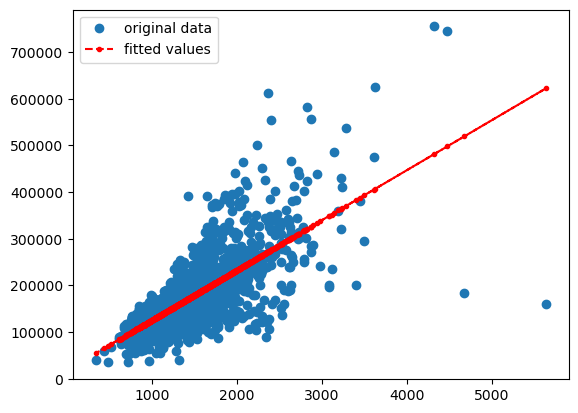

In [23]:
# Original data
plt.plot(df['GrLivArea'], df['SalePrice'], 'o', label='original data')

# Fitted values
X = df['GrLivArea']
X = sm.add_constant(X)  # Add a constant (intercept) term
fitted_values = model.predict(X)

plt.plot(df['GrLivArea'], fitted_values, 'r--.', label='fitted values')

plt.legend()
plt.show()

In [25]:
# Interpretation
# R-squared: 0.502 indicates a good relationship between the variables
# Y (prediction) = SalePrice
# X (input) = GrLivArea
# For each additional GrLivArea on the house, SalePrice increases by 107.1304.

In [27]:
### Q2

In [29]:
X = df['TotalBsmtSF']
y = df['LotArea']

# Fit the linear regression model
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           3.91e-24
Time:                        00:35:57   Log-Likelihood:                -15464.
No. Observations:                1460   AIC:                         3.093e+04
Df Residuals:                    1458   BIC:                         3.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4241.6386    658.492      6.441      0.000    2949.946    5533.331
TotalBsmtSF     5.9344      0.575     10.317      0.000       4.806       7.063
==============================================================================
Omnibus:                     2613.787   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2702216.991
Skew:                          12.411   Prob(JB):                         0.00
Kurtosis:                     212.294   Cond. No.                     2.99e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of the above result

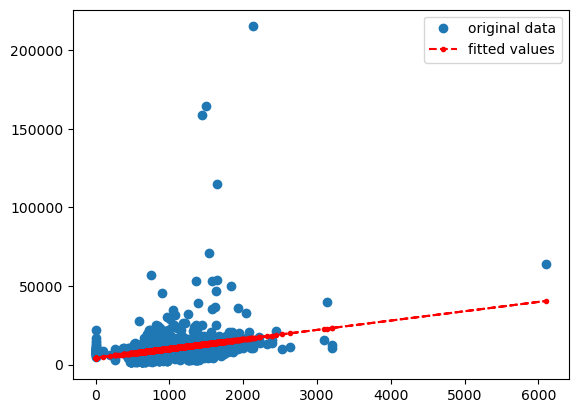

In [33]:
plt.plot(df['TotalBsmtSF'], df['LotArea'], 'o', label='original data')

# Fitted values
X = df['TotalBsmtSF']
X = sm.add_constant(X) 
fitted_values = model.predict(X)

plt.plot(df['TotalBsmtSF'], fitted_values, 'r--.', label='fitted values')

plt.legend()
plt.show()

In [35]:
### Interpretation
# R-squared: 0.068 indicates a weak relationship between the variables since it is lower than 0.3
# Y (prediction) = LotArea
# X (input) = TotalBsmtSF
# For each additional TotalBsmtSF on the house, LotArea increases by 5.9344.

In [37]:
### Q3

In [39]:
# Correlation 1 between GrLivArea and SalePrice
print("Correlation between GrLivArea and SalePrice:", df['GrLivArea'].corr(df['SalePrice']))

# Correlation 2 between TotalBsmtSF and LotArea
print("Correlation between TotalBsmtSF and LotArea:", df['TotalBsmtSF'].corr(df['LotArea']))

Correlation between GrLivArea and SalePrice: 0.7086244776126522
Correlation between TotalBsmtSF and LotArea: 0.2608331345451575


In [43]:
# Correlation 1:

# It is evident that there exists a pronounced positive correlation of 0.708 between GrLivArea and SalePrice.
# This signifies that with an increase in GrLivArea, SalePrice tends to rise correspondingly. This correlation is
# visually reinforced by our R squared value and by the close alignment of data points with the regression line in the graph. In essence, this finding
# reaffirms our conclusion from the initial part of the question: as the area(GrLivArea) of the houses increase,
# the sale pricing of the house increases as well.

# Correlation 2:

# The correlation between TotalBsmtSF and LotArea is noticeably weak at 0.260, indicating a weak relationship between the variables.
# This absence of a strong correlation is further underscored by the R squared value and scatterplot, where data point
# and do not conform to the regression line. Consequently, this observation corroborates our response from the second part
# of the question: there is no discernible linear connection TotalBsmtSF and LotArea.

In [45]:
### Q4

In [47]:
one_hot = pd.get_dummies(df, columns=['PavedDrive', 'SaleCondition'], dtype=int)

In [49]:
one_hot

,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,2003,856,856,854,1710,1,0,...,208500,0,0,1,0,0,0,0,1,0
1,9600,6,8,1976,1262,1262,0,1262,0,1,...,181500,0,0,1,0,0,0,0,1,0
2,11250,7,5,2001,920,920,866,1786,1,0,...,223500,0,0,1,0,0,0,0,1,0
3,9550,7,5,1915,756,961,756,1717,1,0,...,140000,0,0,1,1,0,0,0,0,0
4,14260,8,5,2000,1145,1145,1053,2198,1,0,...,250000,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,1999,953,953,694,1647,0,0,...,175000,0,0,1,0,0,0,0,1,0
1456,13175,6,6,1978,1542,2073,0,2073,1,0,...,210000,0,0,1,0,0,0,0,1,0
1457,9042,7,9,1941,1152,1188,1152,2340,0,0,...,266500,0,0,1,0,0,0,0,1,0
1458,9717,5,6,1950,1078,1078,0,1078,1,0,...,142125,0,0,1,0,0,0,0,1,0


In [51]:
one_hot.dtypes

LotArea                  int64
OverallQual              int64
OverallCond              int64
YearBuilt                int64
TotalBsmtSF              int64
1stFlrSF                 int64
2ndFlrSF                 int64
GrLivArea                int64
BsmtFullBath             int64
BsmtHalfBath             int64
FullBath                 int64
HalfBath                 int64
BedroomAbvGr             int64
KitchenAbvGr             int64
Fireplaces               int64
GarageCars               int64
SalePrice                int64
PavedDrive_N             int32
PavedDrive_P             int32
PavedDrive_Y             int32
SaleCondition_Abnorml    int32
SaleCondition_AdjLand    int32
SaleCondition_Alloca     int32
SaleCondition_Family     int32
SaleCondition_Normal     int32
SaleCondition_Partial    int32
dtype: object

In [53]:
X = one_hot.drop(['SalePrice'], axis=1)
Y = one_hot['SalePrice']

X = sm.add_constant(X)  


In [55]:
X.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,8450,7,5,2003,856,856,854,1710,1,...,2,0,0,1,0,0,0,0,1,0
1,1.0,9600,6,8,1976,1262,1262,0,1262,0,...,2,0,0,1,0,0,0,0,1,0
2,1.0,11250,7,5,2001,920,920,866,1786,1,...,2,0,0,1,0,0,0,0,1,0
3,1.0,9550,7,5,1915,756,961,756,1717,1,...,3,0,0,1,1,0,0,0,0,0
4,1.0,14260,8,5,2000,1145,1145,1053,2198,1,...,3,0,0,1,0,0,0,0,1,0


In [57]:
modelcat = sm.OLS(Y,X).fit()

In [59]:
modelcat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     255.0
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:37:16   Log-Likelihood:                -17357.
No. Observations:                1460   AIC:                         3.476e+04
Df Residuals:                    1436   BIC:                         3.489e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -4.947e+05    7.3e+04     -6.780      0.000   -6.38e+05   -3.52e+05
LotArea                   0.4440      0.102      4.365      0.000       0.244       0.644
OverallQual            1.692e+04   1177.941     14.367      0.000    1.46e+04    1.92e+04
OverallCond            6039.0894    956.584      6.313      0.000    4162.637    7915.541
YearBuilt               341.6491     56.102      6.090      0.000     231.598     451.700
TotalBsmtSF              12.9967      4.158      3.126      0.002       4.841      21.153
1stFlrSF                 36.2027     20.439      1.771      0.077      -3.891      76.297
2ndFlrSF                 25.9362     20.177      1.285      0.199     -13.643      65.515
GrLivArea                30.7754     19.778      1.556      0.120      -8.021      69.572
BsmtFullBath           1.383e+04   2034.384      6.798      0.000    9839.087    1.78e+04
BsmtHalfBath           5091.5630   4051.182      1.257      0.209   -2855.307     1.3e+04
FullBath               2350.7552   2825.817      0.832      0.406   -3192.416    7893.927
HalfBath               -138.2292   2692.136     -0.051      0.959   -5419.170    5142.712
BedroomAbvGr          -5317.9224   1482.744     -3.587      0.000   -8226.498   -2409.346
KitchenAbvGr          -2.131e+04   4855.873     -4.388      0.000   -3.08e+04   -1.18e+04
Fireplaces             5008.3921   1771.339      2.827      0.005    1533.703    8483.081
GarageCars             1.259e+04   1732.280      7.267      0.000    9189.770     1.6e+04
PavedDrive_N          -1.604e+05    2.4e+04     -6.681      0.000   -2.07e+05   -1.13e+05
PavedDrive_P          -1.692e+05   2.46e+04     -6.881      0.000   -2.17e+05   -1.21e+05
PavedDrive_Y          -1.652e+05   2.52e+04     -6.555      0.000   -2.15e+05   -1.16e+05
SaleCondition_Abnorml -9.189e+04   1.28e+04     -7.157      0.000   -1.17e+05   -6.67e+04
SaleCondition_AdjLand  -7.13e+04   1.96e+04     -3.647      0.000    -1.1e+05   -3.29e+04
SaleCondition_Alloca  -8.899e+04   1.57e+04     -5.651      0.000    -1.2e+05   -5.81e+04
SaleCondition_Family  -9.712e+04    1.4e+04     -6.914      0.000   -1.25e+05   -6.96e+04
SaleCondition_Normal  -8.492e+04   1.27e+04     -6.692      0.000    -1.1e+05      -6e+04
SaleCondition_Partial -6.052e+04   1.35e+04     -4.475      0.000    -8.7e+04    -3.4e+04
==============================================================================
Omnibus:                      755.660   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139793.792
Skew:                          -1.296   Prob(JB):                         0.00
Kurtosis:                      50.867   Cond. No.                     5.88e+17
==============================================================================

In [70]:
modelcat.pvalues

const                    1.748584e-11
LotArea                  1.360238e-05
OverallQual              7.800179e-44
OverallCond              3.635293e-10
YearBuilt                1.448894e-09
TotalBsmtSF              1.808700e-03
1stFlrSF                 7.673325e-02
2ndFlrSF                 1.988429e-01
GrLivArea                1.199107e-01
BsmtFullBath             1.550604e-11
BsmtHalfBath             2.090272e-01
FullBath                 4.056121e-01
HalfBath                 9.590573e-01
BedroomAbvGr             3.463315e-04
KitchenAbvGr             1.227827e-05
Fireplaces               4.756968e-03
GarageCars               6.026648e-13
PavedDrive_N             3.388581e-11
PavedDrive_P             8.871643e-12
PavedDrive_Y             7.718488e-11
SaleCondition_Abnorml    1.307567e-12
SaleCondition_AdjLand    2.748268e-04
SaleCondition_Alloca     1.920894e-08
SaleCondition_Family     7.062461e-12
SaleCondition_Normal     3.154105e-11
SaleCondition_Partial    8.257454e-06
dtype: float

##### Interpretation

##### The R-squared value is 0.803 which shows a very good relationship between all the input variables and SalePrice and shows that the model is 80.3% effective. The model is effective to a good extent.

##### The 3 most significant varibales are OverallQual, GarageCars and SaleCondition_Abnorml because their p-value is less than 0.05 and the smallest. It means that they have big impact on the SalePrice. The 3 least significant varibales ares HalfBath, FullBath and BsmtHalfBath because their p-value is above 0.05 and the highest so it means they have less impact on the SalePrice..

In [73]:
filename = 'regmodelcat.pkl'
pickle.dump(modelcat, open(filename, 'wb'))

In [75]:
loaded_model = pickle.load(open('regmodelcat.pkl', 'rb'))

In [77]:
new_input = pd.DataFrame({'const': [1.0],
                       'LotArea':[10000],
                       'OverallQual':[6],
                       'OverallCond': [5],
                       'YearBuilt': [2002],
                       'TotalBsmtSF': [1050],
                       '1stFlrSF':[850],
                       '2ndFlrSF': [700],
                       'GrLivArea': [1760],
                       'BsmtFullBath':[1],
                       'BsmtHalfBath':[0],
                       'FullBath':[1],
                       'HalfBath':[1],
                       'BedroomAbvGr':[3],
                       'KitchenAbvGr': [1],
                       'Fireplaces':[1],
                       'GarageCars':[2],
                       'SaleCondition_Abnorml':[0],
                       'SaleCondition_AdjLand':[0],
                       'SaleCondition_Alloca':[0],
                       'SaleCondition_Family':[1],
                       'SaleCondition_Normal':[0],
                       'SaleCondition_Partial':[0],
                       'PavedDrive_N':[0],
                       'PavedDrive_P':[0],
                       'PavedDrive_Y':[1]
                      })


In [79]:
new_input

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,...,GarageCars,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,10000,6,5,2002,1050,850,700,1760,1,...,2,0,0,0,1,0,0,0,0,1


In [81]:
new_input = new_input.reindex(columns=loaded_model.model.exog_names, fill_value=0)

# Ensure all columns are numeric
new_input = new_input.astype(float)

# Predict SalePrice using the loaded model
predicted_sale_price = loaded_model.predict(new_input)

print("The predicted SalePrice is:", predicted_sale_price.values[0])

The predicted SalePrice is: 188842.23201710283


In [83]:
# Interpretation
# For the new house, the predicted SalePrice is 188842.232017 using our regression model.¶

In [85]:
### Q5

In [87]:
X = one_hot.drop(['LotArea'], axis=1)
Y = one_hot['LotArea']

X = sm.add_constant(X)  

In [89]:
X.head()

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,7,5,2003,856,856,854,1710,1,0,...,208500,0,0,1,0,0,0,0,1,0
1,1.0,6,8,1976,1262,1262,0,1262,0,1,...,181500,0,0,1,0,0,0,0,1,0
2,1.0,7,5,2001,920,920,866,1786,1,0,...,223500,0,0,1,0,0,0,0,1,0
3,1.0,7,5,1915,756,961,756,1717,1,0,...,140000,0,0,1,1,0,0,0,0,0
4,1.0,8,5,2000,1145,1145,1053,2198,1,0,...,250000,0,0,1,0,0,0,0,1,0


In [91]:
modell2 = sm.OLS(Y,X).fit()

In [93]:
modell2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LotArea   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     13.01
Date:                Sun, 20 Oct 2024   Prob (F-statistic):           8.65e-45
Time:                        00:39:23   Log-Likelihood:                -15377.
No. Observations:                1460   AIC:                         3.080e+04
Df Residuals:                    1436   BIC:                         3.093e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4.331e+04   1.91e+04      2.271      0.023    5902.290    8.07e+04
OverallQual           -1893.6453    320.810     -5.903      0.000   -2522.952   -1264.339
OverallCond             -81.4211    249.930     -0.326      0.745    -571.688     408.845
YearBuilt               -29.0314     14.625     -1.985      0.047     -57.719      -0.343
TotalBsmtSF               1.9934      1.074      1.856      0.064      -0.113       4.100
1stFlrSF                  5.4271      5.272      1.029      0.303      -4.914      15.768
2ndFlrSF                  3.2060      5.202      0.616      0.538      -6.999      13.411
GrLivArea                -1.7279      5.101     -0.339      0.735     -11.735       8.279
BsmtFullBath           1710.6717    530.777      3.223      0.001     669.491    2751.852
BsmtHalfBath           2038.1382   1043.302      1.954      0.051      -8.422    4084.698
FullBath                458.7982    728.374      0.630      0.529    -969.994    1887.590
HalfBath               -527.2643    693.707     -0.760      0.447   -1888.052     833.523
BedroomAbvGr            536.6054    383.595      1.399      0.162    -215.861    1289.072
KitchenAbvGr          -2310.8834   1258.392     -1.836      0.067   -4779.368     157.601
Fireplaces             2219.8838    454.034      4.889      0.000    1329.243    3110.524
GarageCars              559.8016    454.356      1.232      0.218    -331.471    1451.074
SalePrice                 0.0295      0.007      4.365      0.000       0.016       0.043
PavedDrive_N            1.48e+04   6270.666      2.359      0.018    2494.621    2.71e+04
PavedDrive_P           1.493e+04   6428.733      2.322      0.020    2316.301    2.75e+04
PavedDrive_Y           1.359e+04   6580.330      2.065      0.039     681.353    2.65e+04
SaleCondition_Abnorml  7294.3343   3361.770      2.170      0.030     699.828    1.39e+04
SaleCondition_AdjLand  6914.6106   5058.800      1.367      0.172   -3008.819    1.68e+04
SaleCondition_Alloca   7593.4146   4098.862      1.853      0.064    -446.984    1.56e+04
SaleCondition_Family   6751.5498   3675.619      1.837      0.066    -458.608     1.4e+04
SaleCondition_Normal   7791.1782   3314.989      2.350      0.019    1288.439    1.43e+04
SaleCondition_Partial  6966.6380   3504.950      1.988      0.047      91.266    1.38e+04
==============================================================================
Omnibus:                     2614.176   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2806522.416
Skew:                          12.394   Prob(JB):                         0.00
Kurtosis:                     216.355   Cond. No.                     4.09e+17
==============================================================================

In [98]:
modell2.pvalues

const                    2.328767e-02
OverallQual              4.455178e-09
OverallCond              7.446413e-01
YearBuilt                4.732388e-02
TotalBsmtSF              6.363624e-02
1stFlrSF                 3.034238e-01
2ndFlrSF                 5.378269e-01
GrLivArea                7.348783e-01
BsmtFullBath             1.297222e-03
BsmtHalfBath             5.094898e-02
FullBath                 5.288646e-01
HalfBath                 4.473389e-01
BedroomAbvGr             1.620633e-01
KitchenAbvGr             6.650849e-02
Fireplaces               1.125990e-06
GarageCars               2.181220e-01
SalePrice                1.360238e-05
PavedDrive_N             1.843569e-02
PavedDrive_P             2.037643e-02
PavedDrive_Y             3.908688e-02
SaleCondition_Abnorml    3.018630e-02
SaleCondition_AdjLand    1.718869e-01
SaleCondition_Alloca     6.414958e-02
SaleCondition_Family     6.643903e-02
SaleCondition_Normal     1.889359e-02
SaleCondition_Partial    4.703934e-02
dtype: float

####  Interpretation
####   The R-squared value is 0.172 which shows a relatively weak relationship between all the input variables and LotArea and shows that the model is 17.2% effective. The model's effectiveness is quite limited.
#### The 3 most significant varibales are OverallQual, Fireplaces and SalePrice because their p-value is less than 0.05 and the smallest. It means that they have big impact on the LotArea. The 3 least significant varibales ares OverallCond, GrLivArea and 2ndFlrSF because their p-value is above 0.05 and the highest so it means they have less impact on the LotArea.¶¶

In [101]:
filename = 'regmodelall2.pkl'
pickle.dump(modell2, open(filename, 'wb'))

In [103]:
loaded_model = pickle.load(open('regmodelall2.pkl', 'rb'))

In [105]:
X.head()

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,7,5,2003,856,856,854,1710,1,0,...,208500,0,0,1,0,0,0,0,1,0
1,1.0,6,8,1976,1262,1262,0,1262,0,1,...,181500,0,0,1,0,0,0,0,1,0
2,1.0,7,5,2001,920,920,866,1786,1,0,...,223500,0,0,1,0,0,0,0,1,0
3,1.0,7,5,1915,756,961,756,1717,1,0,...,140000,0,0,1,1,0,0,0,0,0
4,1.0,8,5,2000,1145,1145,1053,2198,1,0,...,250000,0,0,1,0,0,0,0,1,0


In [107]:
df_new_input = pd.DataFrame({'const': [1.0],
                       'OverallQual':[6],
                       'OverallCond': [5],
                       'YearBuilt': [2002],
                       'TotalBsmtSF': [1050],
                       '1stFlrSF':[850],
                       '2ndFlrSF': [700],
                       'GrLivArea': [1760],
                       'BsmtFullBath':[1],
                       'BsmtHalfBath':[0],
                       'FullBath':[1],
                       'HalfBath':[1],
                       'BedroomAbvGr':[3],
                       'KitchenAbvGr': [1],
                       'Fireplaces':[1],
                       'GarageCars':[2],
                       'SalePrice':[185000],
                       'SaleCondition_Abnorml':[0],
                       'SaleCondition_AdjLand':[0],
                       'SaleCondition_Alloca':[0],
                       'SaleCondition_Family':[1],
                       'SaleCondition_Normal':[0],
                       'SaleCondition_Partial':[0],
                       'PavedDrive_N':[0],
                       'PavedDrive_P':[0],
                       'PavedDrive_Y':[1]
                      })

In [109]:
df_new_input

,const,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,...,SalePrice,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,6,5,2002,1050,850,700,1760,1,0,...,185000,0,0,0,1,0,0,0,0,1


In [111]:
df_new_input = df_new_input.reindex(columns=loaded_model.model.exog_names, fill_value=0)

# Ensure all columns are numeric
df_new_input = df_new_input.astype(float)

# Predict SalePrice using the loaded model
predicted_LotArea = loaded_model.predict(df_new_input)

print("The predicted LotArea is:", predicted_LotArea.values[0])

The predicted LotArea is: 9409.277573313637


In [113]:
# Interpretation
# For the new house, the predicted LotArea is 9409.277573 using our regression model.

In [115]:
## Q6

In [117]:
modelcat.pvalues

const                    1.748584e-11
LotArea                  1.360238e-05
OverallQual              7.800179e-44
OverallCond              3.635293e-10
YearBuilt                1.448894e-09
TotalBsmtSF              1.808700e-03
1stFlrSF                 7.673325e-02
2ndFlrSF                 1.988429e-01
GrLivArea                1.199107e-01
BsmtFullBath             1.550604e-11
BsmtHalfBath             2.090272e-01
FullBath                 4.056121e-01
HalfBath                 9.590573e-01
BedroomAbvGr             3.463315e-04
KitchenAbvGr             1.227827e-05
Fireplaces               4.756968e-03
GarageCars               6.026648e-13
PavedDrive_N             3.388581e-11
PavedDrive_P             8.871643e-12
PavedDrive_Y             7.718488e-11
SaleCondition_Abnorml    1.307567e-12
SaleCondition_AdjLand    2.748268e-04
SaleCondition_Alloca     1.920894e-08
SaleCondition_Family     7.062461e-12
SaleCondition_Normal     3.154105e-11
SaleCondition_Partial    8.257454e-06
dtype: float

In [126]:
one_hot_new = one_hot.drop(['1stFlrSF','2ndFlrSF','GrLivArea', 'BsmtHalfBath', 'FullBath', 'HalfBath'], axis=1)

In [131]:
x = one_hot_new.drop(['SalePrice'],axis=1)
y = one_hot['SalePrice']
x = sm.add_constant(x)
modelall3 = sm.OLS(y,x).fit()

In [134]:
modelall3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     258.4
Date:                Sun, 20 Oct 2024   Prob (F-statistic):               0.00
Time:                        00:42:20   Log-Likelihood:                -17524.
No. Observations:                1460   AIC:                         3.508e+04
Df Residuals:                    1442   BIC:                         3.518e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.244e+05   7.03e+04     -4.617      0.000   -4.62e+05   -1.87e+05
LotArea                   0.6879      0.113      6.112      0.000       0.467       0.909
OverallQual             2.63e+04   1172.051     22.435      0.000     2.4e+04    2.86e+04
OverallCond            5003.4352   1056.883      4.734      0.000    2930.242    7076.628
YearBuilt               188.4952     53.575      3.518      0.000      83.402     293.588
TotalBsmtSF              29.0364      3.123      9.297      0.000      22.910      35.163
BsmtFullBath           1.207e+04   2200.508      5.486      0.000    7754.908    1.64e+04
BedroomAbvGr           9735.2845   1368.080      7.116      0.000    7051.645    1.24e+04
KitchenAbvGr          -4621.8269   5200.420     -0.889      0.374   -1.48e+04    5579.372
Fireplaces             1.453e+04   1873.409      7.757      0.000    1.09e+04    1.82e+04
GarageCars             1.898e+04   1892.292     10.030      0.000    1.53e+04    2.27e+04
PavedDrive_N          -1.014e+05   2.31e+04     -4.392      0.000   -1.47e+05   -5.61e+04
PavedDrive_P          -1.148e+05   2.37e+04     -4.841      0.000   -1.61e+05   -6.83e+04
PavedDrive_Y          -1.081e+05   2.45e+04     -4.413      0.000   -1.56e+05   -6.01e+04
SaleCondition_Abnorml -6.118e+04   1.23e+04     -4.955      0.000   -8.54e+04    -3.7e+04
SaleCondition_AdjLand -4.677e+04    2.1e+04     -2.226      0.026    -8.8e+04   -5555.581
SaleCondition_Alloca  -5.117e+04    1.6e+04     -3.204      0.001   -8.25e+04   -1.98e+04
SaleCondition_Family  -7.729e+04   1.41e+04     -5.490      0.000   -1.05e+05   -4.97e+04
SaleCondition_Normal  -5.708e+04   1.23e+04     -4.640      0.000   -8.12e+04   -3.29e+04
SaleCondition_Partial -3.089e+04   1.33e+04     -2.321      0.020    -5.7e+04   -4781.637
==============================================================================
Omnibus:                      634.582   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            28283.258
Skew:                           1.287   Prob(JB):                         0.00
Kurtosis:                      24.408   Cond. No.                     2.24e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.22e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [148]:
## Model with All Inputs: R-squared = 0.803
## Model with Few Inputs: R-squared = 0.753
## While the initial model has a higher R-squared, the new model with fewer inputs still performs quite well with an R-squared of 0.753. Therefore, the new model is likely preferable due to its simplicity and generalization, achieving similar performance with fewer, more important predictors.

In [151]:
## Q7

In [153]:
x.head()

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1.0,8450,7,5,2003,856,1,3,1,0,2,0,0,1,0,0,0,0,1,0
1,1.0,9600,6,8,1976,1262,0,3,1,1,2,0,0,1,0,0,0,0,1,0
2,1.0,11250,7,5,2001,920,1,3,1,1,2,0,0,1,0,0,0,0,1,0
3,1.0,9550,7,5,1915,756,1,3,1,1,3,0,0,1,1,0,0,0,0,0
4,1.0,14260,8,5,2000,1145,1,4,1,1,3,0,0,1,0,0,0,0,1,0


In [175]:
three_new = pd.DataFrame({
    'const': [1.0, 1.0, 1.0],
    'LotArea': [12000, 8500, 15000],
    'OverallQual': [7, 5, 8],
    'OverallCond': [6, 5, 8],
    'YearBuilt': [2010, 1995, 2018],
    'TotalBsmtSF': [1200, 800, 1400],
    'BsmtFullBath': [1, 0, 2],
    'BedroomAbvGr': [4, 3, 5],
    'KitchenAbvGr': [1, 1, 1],
    'Fireplaces': [2, 1, 3],
    'GarageCars': [3, 2, 2],
    'SaleCondition_Abnorml': [0, 0, 0],
    'SaleCondition_AdjLand': [0, 0, 0],
    'SaleCondition_Alloca': [0, 0, 0],
    'SaleCondition_Family': [1, 0, 0],
    'SaleCondition_Normal': [0, 1, 1],
    'SaleCondition_Partial': [0, 0, 0],
    'PavedDrive_N': [0, 1, 0],
    'PavedDrive_P': [0, 0, 0],
    'PavedDrive_Y': [1, 0, 1]
})

In [177]:
three_new

,const,LotArea,OverallQual,OverallCond,YearBuilt,TotalBsmtSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,1.0,12000,7,6,2010,1200,1,4,1,2,3,0,0,0,1,0,0,0,0,1
1,1.0,8500,5,5,1995,800,0,3,1,1,2,0,0,0,0,1,0,1,0,0
2,1.0,15000,8,8,2018,1400,2,5,1,3,2,0,0,0,0,1,0,0,0,1


In [179]:
modelall3.predict(three_new)

0    352019.780561
1    190266.036997
2    429470.506593
dtype: float64

In [183]:
## The predicted SalePrices makes sense based on the features of the houses. Each predicted price corresponds logically to the attributes of the respective houses, indicating that the model is functioning as expected.
# 352019.780561 for a well-sized and good-quality house is reasonable.
# 190266.036997 reflects the lower quality and size of the second house.
# 3429470.506593 appropriately indicates a high-end property with desirable attributes.